# Modelos Pre-entrenados

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


Saving chita.jpg to chita (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


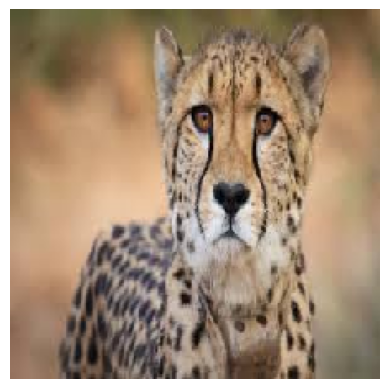

Predicciones:
 1: cheetah (0.989)
 2: jaguar (0.006)
 3: leopard (0.004)
 4: snow_leopard (0.000)
 5: lynx (0.000)


In [20]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Cargar el modelo VGG16 preentrenado
model = VGG16(weights='imagenet')
print(model.summary())

DATOS_DIR = 'Datos/' # ruta a las imagenes
try:
    # intenta cargar imagen desde carpeta local
    imgColor = image.load_img(DATOS_DIR + 'Casitas.jpg', target_size=(224, 224))
except:
    # Subir una imagen desde la computadora
    uploaded = files.upload()
    imgColor = image.load_img(list(uploaded.keys())[0], target_size=(224, 224))

# Cargar y preprocesar la imagen
img_array = image.img_to_array(imgColor)       # convierte a arreglo numpy
img_array = np.expand_dims(img_array, axis=0)  # agrega dimension requerida por modelo: (1, 224, 224, 3)
img_array = preprocess_input(img_array)        # preprocesa imagen para dar formato correcto para VGG16

# Hacer la predicción
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Mostrar la imagen y las predicciones
plt.imshow(imgColor)
plt.axis('off')
plt.show()

# Recorre las mejores e imprime posición, etiqueta y puntaje de prediccion
print('Predicciones:')
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f" {i + 1}: {label} ({score:.3f})")



In [18]:
print(decoded_predictions)

[('n02130308', 'cheetah', 0.98862326), ('n02128925', 'jaguar', 0.0064419406), ('n02128385', 'leopard', 0.004097438), ('n02128757', 'snow_leopard', 0.00035673095), ('n02127052', 'lynx', 0.00026753685)]
